In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
import random
from sklearn import preprocessing
from math import sqrt
from numpy import mean
from numpy import std
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


train = pd.read_csv("dataset_1.csv")
train.head(10)

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,5.496528,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,6.768056,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,2.856944,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,3.534028,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
5,6.988889,0.0,5.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,1,0,0
6,2.686806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1,0,0,0,0,0,0,0,1,0
7,5.364583,0.0,4.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0,1,0,0,0,1,0,0,0,0
8,19.197917,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
9,3.565972,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [2]:
Y = train['LOS'].values
X = train.drop(columns=['LOS'])
print(X.shape, Y.shape)
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

(51037, 48) (51037,)


In [28]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [41]:
from sklearn.linear_model import LinearRegression
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('MSE: %.3f, Std: (%.3f)' % (-1*mean(scores), std(scores)))
print(-1*scores)
model.fit(X_train, y_train)
pred=model.predict(X_test);
mse = mean_squared_error(y_test, pred)
print("MSE: %f" % (mse))

MSE: 104.846, Std: (7.446)
[108.92177033  99.17528163 106.03322222 103.0250227  120.57374173
 106.46512402  97.14740443  96.23586798 113.08466336  97.7968224 ]
MSE: 97.712304


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
xt=X_train.astype(int)
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(xt,y_train)
pred2=polyreg.predict(X_test)
mse2 = mean_squared_error(y_test, pred2)
print("MSE: %0.3f" % (mse2))

MSE: 2474521718422242852864.000


In [18]:
from sklearn.linear_model import Lasso


m3 = Lasso()
params = {'alpha': [0.4, 0.6, 0.8, 1] }
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m3, param_grid=params, scoring=scorer, cv=5)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'alpha': 1}

In [42]:
from sklearn.linear_model import Lasso
cv3 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model3 = Lasso(alpha=1)
# evaluate model
scores3 = cross_val_score(model3, X_train, y_train, scoring='neg_mean_squared_error', cv=cv3, n_jobs=-1)
# report performance
print('MSE: %.3f, Std: (%.3f)' % (-1*mean(scores3), std(scores3)))
print(-1*scores3)
model3.fit(X_train, y_train)
pred3=model3.predict(X_test);
mse3 = mean_squared_error(y_test, pred3)
print("MSE: %f" % (mse3))

MSE: 113.956, Std: (7.695)
[118.54618545 108.40311358 112.28231535 110.34479105 128.45455365
 118.3679945  109.08691374 105.40287582 124.27269522 104.39471243]
MSE: 105.399665


In [22]:
from sklearn.linear_model import Ridge
m4 = Ridge()
params = {'alpha': [0.2, 0.4, 0.6, 0.8, 1] }
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m4, param_grid=params, scoring=scorer, cv=10)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'alpha': 0.2}

In [43]:
from sklearn.linear_model import Ridge
cv4 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model4 = Ridge(alpha=0.2)
# evaluate model
scores4 = cross_val_score(model4, X_train, y_train, scoring='neg_mean_squared_error', cv=cv4, n_jobs=-1)
# report performance
print('MSE: %.3f, Std: (%.3f)' % (-1*mean(scores4), std(scores4)))
print(-1*scores4)
model4.fit(X_train, y_train)
pred4=model4.predict(X_test);
mse4 = mean_squared_error(y_test, pred4)
print("MSE: %f" % (mse4))

MSE: 104.831, Std: (7.427)
[108.92949629  99.13391533 106.03815677 103.04247225 120.57816752
 106.4739851   97.13329545  96.26844156 112.90364747  97.81335166]
MSE: 97.703404


In [29]:
from sklearn.neighbors import KNeighborsRegressor
m5 = KNeighborsRegressor(n_jobs=-1)
params = {'n_neighbors': [5,7,11,15], 'p':[1,2], 'leaf_size':[5,15,25,30,45]}
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m5, param_grid=params, scoring=scorer, cv=10)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'leaf_size': 5, 'n_neighbors': 5, 'p': 1}

In [46]:
from sklearn.neighbors import KNeighborsRegressor
cv5 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model5 = KNeighborsRegressor(leaf_size= 5, n_neighbors= 5, p= 1,n_jobs=-1)
# evaluate model
scores5 = cross_val_score(model5, X_train, y_train, scoring='neg_mean_squared_error', cv=cv5, n_jobs=-1)
# report performance
print('MSE: %.3f, Std: (%.3f)' % (-1*mean(scores5), std(scores5)))
print(-1*scores5)
model5.fit(X_train, y_train)
pred5=model5.predict(X_test);
mse5 = mean_squared_error(y_test, pred5)
print("MSE: %f" % (mse5))

MSE: 112.783, Std: (6.781)
[109.41624556 112.10185729 114.62913951 110.85888914 126.27504403
 115.69607132 113.09671522 102.18996128 120.02901305 103.53272328]
MSE: 99.194819


In [32]:
from sklearn.tree import DecisionTreeRegressor
m6 = DecisionTreeRegressor()
params = {'max_depth': [6,8,10], 'min_samples_leaf':[1,5,10,20,50]}
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m6, param_grid=params, scoring=scorer, cv=10)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'max_depth': 10, 'min_samples_leaf': 1}

MSE: 112.938, Std: (9.841)
[104.40927989 103.88041536 113.06267358 103.06172755 136.13459455
 116.45082295 107.96432309 106.60483771 122.75684299 115.05255074]
MSE: 94.362445
Feature: 0, Score: 0.75054
Feature: 1, Score: 1.06391
Feature: 2, Score: 2.05834
Feature: 3, Score: 5.91568
Feature: 4, Score: 1.21338
Feature: 5, Score: 1.47795
Feature: 6, Score: 11.75393
Feature: 7, Score: 5.78371
Feature: 8, Score: 0.75132
Feature: 9, Score: 0.52190
Feature: 10, Score: 0.78553
Feature: 11, Score: 0.30650
Feature: 12, Score: 9.09092
Feature: 13, Score: 0.18334
Feature: 14, Score: 37.44762
Feature: 15, Score: 9.30287
Feature: 16, Score: 1.54861
Feature: 17, Score: 0.65990
Feature: 18, Score: 1.33613
Feature: 19, Score: 0.58240
Feature: 20, Score: 0.05973
Feature: 21, Score: 1.20953
Feature: 22, Score: 0.10622
Feature: 23, Score: 0.09227
Feature: 24, Score: 0.31306
Feature: 25, Score: 0.75788
Feature: 26, Score: 0.35111
Feature: 27, Score: 0.40742
Feature: 28, Score: 0.08900
Feature: 29, Score: 0

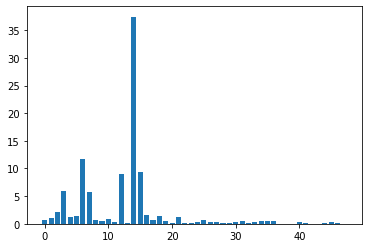

In [40]:
from sklearn.tree import DecisionTreeRegressor
model6 = DecisionTreeRegressor(random_state=0,max_depth = 10, min_samples_leaf = 1)
cv6 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores6 = cross_val_score(model6, X_train, y_train, scoring='neg_mean_squared_error', cv=cv6, n_jobs=-1)
# report performance
print('MSE: %.3f, Std: (%.3f)' % (-1*mean(scores6), std(scores6)))
print(-1*scores6)
model6.fit(X_train, y_train)
pred6=model6.predict(X_test);
mse6 = mean_squared_error(y_test, pred6)
print("MSE: %f" % (mse6))
importance = model6.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,100*v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], 100*importance)
pyplot.show()

In [12]:
import xgboost as xgb
m7 = xgb.XGBRegressor(random_state=0,n_jobs=-1,tree_method='gpu_hist', gpu_id=0)
params = {'max_depth': [10],'eta': [0.05, 0.1], 'lambda': [0.9, 1], 'alpha': [0.1,0.02] }
scorer = make_scorer(mean_squared_error)
clf_grid = GridSearchCV(estimator=m7, param_grid=params, scoring=scorer, cv=3)

clf_grid.fit(X_train, y_train)
best_param = clf_grid.best_params_
best_param

{'alpha': 0.1, 'eta': 0.1, 'lambda': 0.9, 'max_depth': 10}

MSE: 97.284, Std: (6.995)
[ 89.41813647  92.97870418  98.46322239  95.7978015  113.1045531
  94.37325368  97.64245036  92.76247327 106.86449385  91.4374716 ]
MSE: 83.788215
Feature: 0, Score: 0.68058
Feature: 1, Score: 0.95558
Feature: 2, Score: 1.15819
Feature: 3, Score: 2.42652
Feature: 4, Score: 1.06856
Feature: 5, Score: 1.46383
Feature: 6, Score: 5.69671
Feature: 7, Score: 1.37197
Feature: 8, Score: 1.17571
Feature: 9, Score: 1.05727
Feature: 10, Score: 1.30850
Feature: 11, Score: 1.04599
Feature: 12, Score: 6.16923
Feature: 13, Score: 1.00662
Feature: 14, Score: 14.53767
Feature: 15, Score: 4.52120
Feature: 16, Score: 1.82366
Feature: 17, Score: 1.03798
Feature: 18, Score: 8.01119
Feature: 19, Score: 3.56411
Feature: 20, Score: 1.65911
Feature: 21, Score: 3.10571
Feature: 22, Score: 1.58900
Feature: 23, Score: 1.81952
Feature: 24, Score: 1.18188
Feature: 25, Score: 1.36670
Feature: 26, Score: 1.44391
Feature: 27, Score: 1.17703
Feature: 28, Score: 0.97877
Feature: 29, Score: 0.80

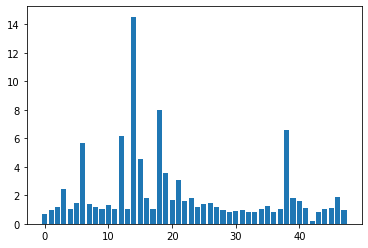

In [37]:
model7 = xgb.XGBRegressor(random_state=0,n_jobs=-1,tree_method='gpu_hist', gpu_id=0, alpha= 0.1, eta= 0.1, max_depth= 10)
cv7 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores7 = cross_val_score(model7, X_train, y_train, scoring='neg_mean_squared_error', cv=cv7, n_jobs=-1)
# report performance
print('MSE: %.3f, Std: (%.3f)' % (-1*mean(scores7), std(scores7)))
print(-1*scores7)
model7.fit(X_train, y_train)
pred7=model7.predict(X_test);
mse7 = mean_squared_error(y_test, pred7)
print("MSE: %f" % (mse7))
importance = model7.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,100*v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], 100*importance)
pyplot.show()